In [56]:
## Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler ## Used for feature scaling 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:\\Users\\hp5cd\\Downloads\\House-Price-Prediction-clean.csv") # get the dataset

In [3]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [4]:
df.tail()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1455,1456,60,7917,6,5,1999,2000,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,0,1078,...,366,0,112,0,0,0,0,4,2010,142125
1459,1460,20,9937,5,6,1965,1965,830,136,1256,...,736,68,0,0,0,0,0,6,2008,147500


In [5]:
df.shape

(1460, 32)

In [6]:
df.info() ## The dataset don't have null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

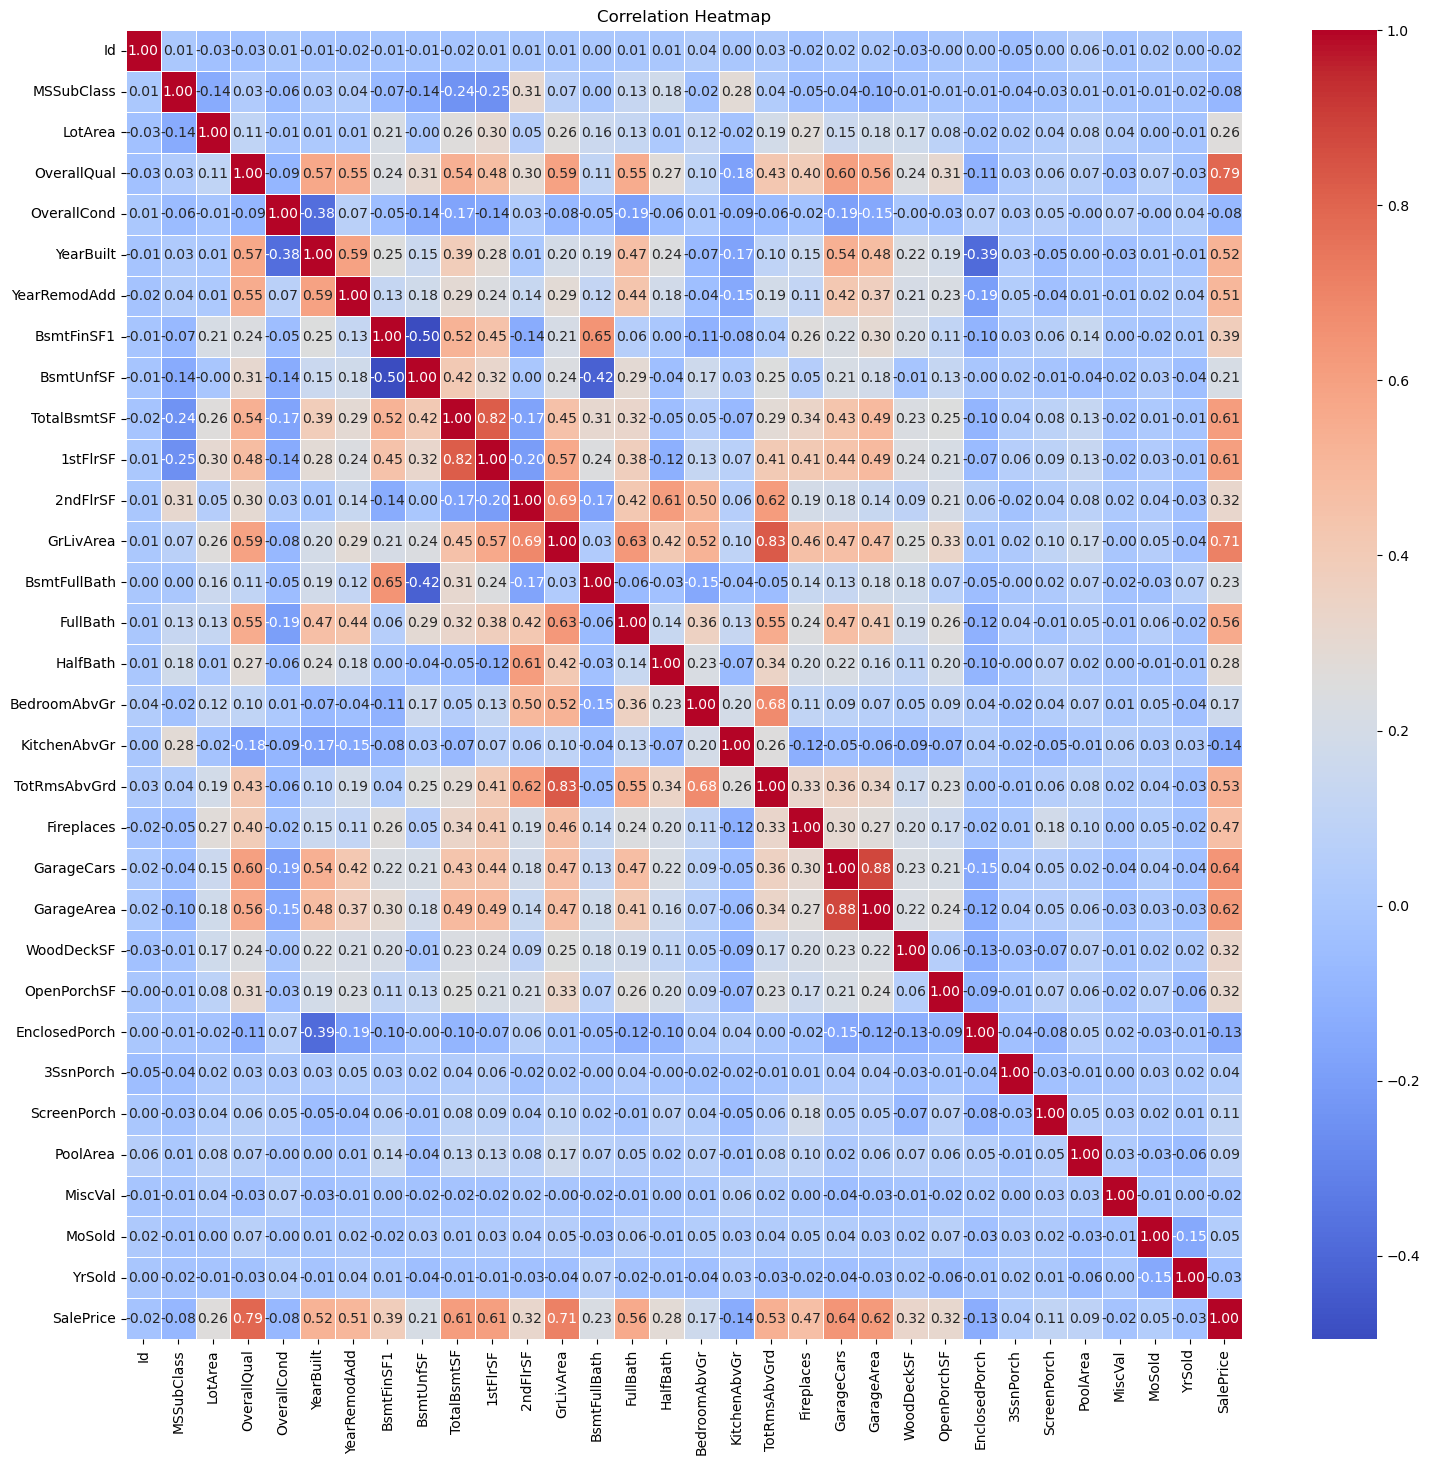

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(18, 17))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
print(correlation_matrix['SalePrice'].sort_values(ascending = False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
MiscVal         -0.021190
Id              -0.021917
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



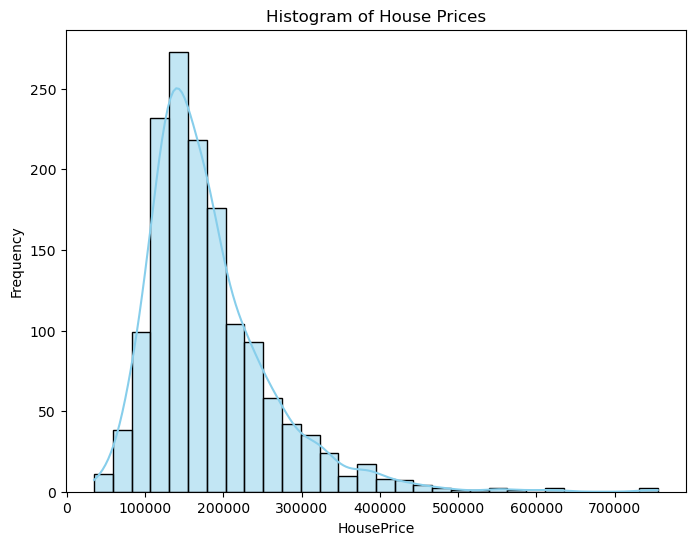

In [22]:
# Assuming df is your DataFrame, and 'house_price' is the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of House Prices")
plt.xlabel("HousePrice")
plt.ylabel("Frequency")
plt.show()


In [18]:
## Further analysis, e.g., checking skewness
skewness = df['SalePrice'].skew()
print(f"Skewness of Sale Prices: {skewness}")

Skewness of Sale Prices: 1.8828757597682129


In [27]:
## Log transformation for reducing the skewness in the target variable and making it more symmetric 
df['log_SalePrice'] = np.log1p(df['SalePrice'])

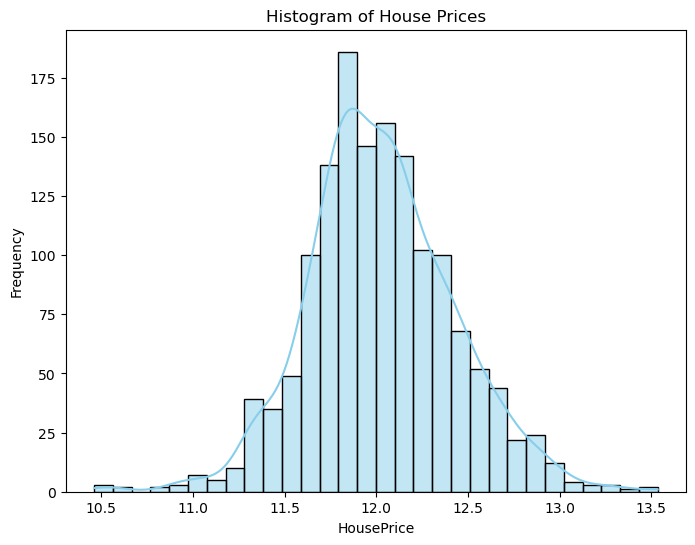

In [28]:
# This will now show the more symmetry in target column due to reduction in skewness
plt.figure(figsize=(8, 6))
sns.histplot(df['log_SalePrice'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of House Prices")
plt.xlabel("HousePrice")
plt.ylabel("Frequency")
plt.show()


In [39]:
X = df.drop(["log_SalePrice","Id"], axis=1) ## Features that I want to drop
y = df["log_SalePrice"] ## feature that I only want in target variable 

In [41]:
## Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Model building and training without hyperparameter tuning !!!!!
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [42]:
print(rmse) ## This shows that our model is approximately 0.0126 from the true values.

0.012648194325636387
